In [2]:
from datetime import datetime as dt
from collections import OrderedDict
import re
import math
import datetime
import seaborn as sns

import pylab
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pylab as pylab

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 


Just some cleansing

In [3]:
train = pd.read_csv('~/Desktop/Python/Kaggle_titanic/train.csv')
test = pd.read_csv('~/Desktop/Python/Kaggle_titanic/test.csv')

col_meanings = [
    'The ID of the passenger',
    'Did the passenger survive ? 1 = Yes, 0 = No',
    'Ordinal Value for passenger class, 1 being the highest',
    'Name',
    'Gender',
    'Age',
    'Passenger\'s siblings and spouses on board with',
    'Passenger\'s parents and children on board',
    'Ticket Number',
    'Passenger Fare',
    'Cabin Number',
    'Port of Embarkation'
]

data_dict = pd.DataFrame({
	'Attribute': train.columns,
	'Type': [train[col].dtype for col in train.columns],
	'Meaning': col_meanings,
	'Example': [train[col].iloc[2] for col in train.columns]

	})


In [6]:
prefix_dict=OrderedDict([])
cleaned_prefix=[]


for raw in [item.split(' ')[0] for item in [pre for pre in train['Ticket'].value_counts().index.tolist() if not pre.isalnum()]]:
    cleaned = re.sub(r'\W+', '', raw)
    
    if raw not in prefix_dict:
        prefix_dict[raw] = cleaned
        
    if cleaned not in cleaned_prefix:
        prefix_dict[cleaned] = raw
        cleaned_prefix.append(cleaned)


So from here on we will analyze the significance of some of the features, below is an attempt to find the means ticket fare for a particular ticket prefix.

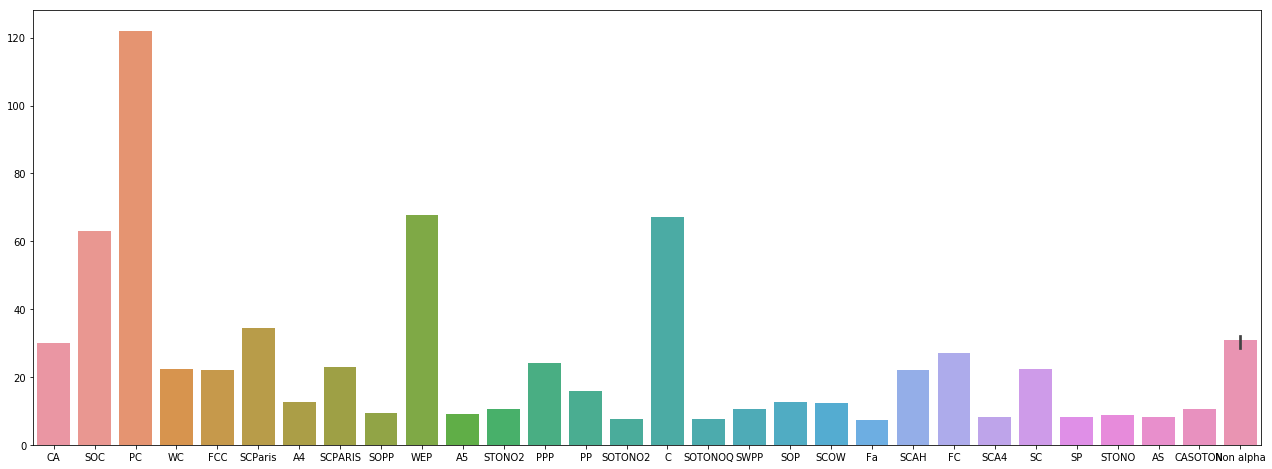

In [25]:
def ticket_means(prefix_list):
	clean_means=[]
	for pre in prefix_list:
		matches = [x for x in prefix_dict if prefix_dict[x]==pre]
		before = train[train['Ticket'].str.contains("|".join(matches))]['Fare'].mean()
		clean_means.append(before)
	clean_means.append(train[train['Ticket'].str.isdigit()]['Fare'].mean())
	return clean_means


x = cleaned_prefix+['Non alpha']
y = ticket_means(cleaned_prefix)


fig, ax = plt.subplots(figsize=(22,8))

sns.barplot(x,y)
plt.show()

Now we need to perform one-hot encoding

In [28]:
train_gender = pd.get_dummies(train['Sex']) 
test_gender = pd.get_dummies(test['Sex'])
train_embarkation = pd.get_dummies(train['Embarked'])
test_embarkation = pd.get_dummies(test['Embarked'])

train = train.drop(['Sex', 'Embarked'], axis=1)
train = train.join([train_gender, train_embarkation])
train = train.rename(columns={'female':'Female', 'male':'Male', 'C':'Churberg', 'Q': 'Queenstown', 'S':'Southampton'})

test= test.drop(['Sex', 'Embarked'], axis=1)
test = test.join([test_gender, test_embarkation])
test = test.rename(columns={'female':'Female', 'male':'Male', 'C':'Churberg', 'Q': 'Queenstown', 'S':'Southampton'})

KeyError: 'Sex'